# (fordgobike)
## by (Abdelrahman Ragab)

## Investigation Overview

> I want to look at to the customer behaviour characteristics, I focused on  age, gender, duration, 
and user type to analyze and understand the usage of bike When, Who, How?



## Dataset Overview

> The dataset used for this exploratory analysis consists of monthly individual trip rides data 2017



In [10]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('new_rides_data.csv')

df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,bike_share_for_all_trip,member_age,start_time_month,start_time_monthly,start_time_day,start_time_hour,end_time_hour,duration_min,age_category,start_dayofweek
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,...,No,37,February,19-02,Thursday,17,8,869.750000,31-40,Thursday
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),...,No,49,February,19-02,Thursday,12,5,1030.900000,41-50,Thursday
2,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,...,No,32,February,19-02,Thursday,17,4,608.166667,31-40,Thursday
3,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,...,Yes,47,February,19-02,Thursday,23,0,26.416667,41-50,Thursday
4,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,...,No,62,February,19-02,Thursday,23,0,29.883333,61-70,Thursday


## (visual 1  - user types)

> In our dataset there are two type of user:

- Subscriber
- Customer

In the next visualization I will show the percentage of bike rides for all members user type



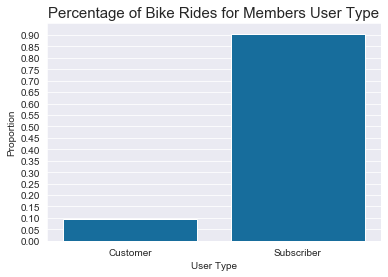

In [11]:
n_points = df.shape[0]

max_count_age = df['user_type'].value_counts().max()
max_prop_age = max_count_age / n_points

tick_props_age = np.arange(0, max_prop_age, 0.05)
tick_names_age = ['{:0.2f}'.format(v) for v in tick_props_age]

sns.countplot(data=df, x='user_type', color=base_color)

ax = plt.gca()
plt.yticks(tick_props_age * n_points, tick_names_age)
ax.set_ylabel('Proportion')
ax.set_xlabel('User Type')
ax.set_title("Percentage of Bike Rides for Members User Type", fontsize=15);


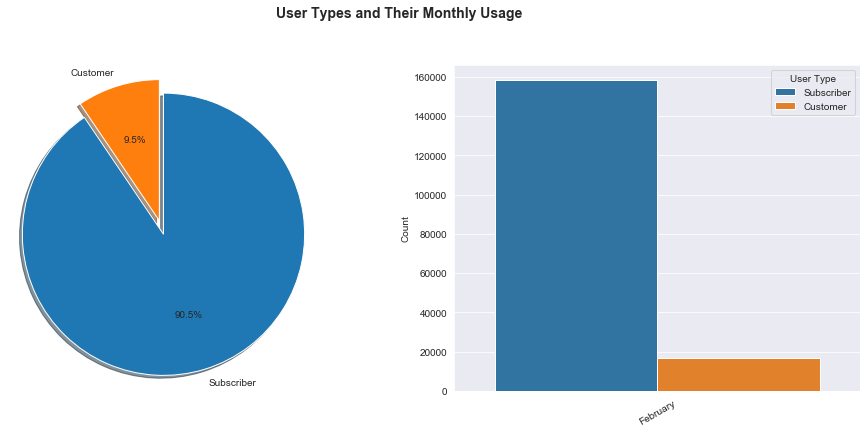

In [8]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = df.user_type.value_counts()/df.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
ax = sb.countplot(data=df, x='start_time_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('User Types and Their Monthly Usage', fontsize=14, fontweight='semibold', y=1.015);


## (Visual 2  -)

> Based on our data we have three gender male, female and other. In the next visualization I will show the number of bike rides for each day based on gender



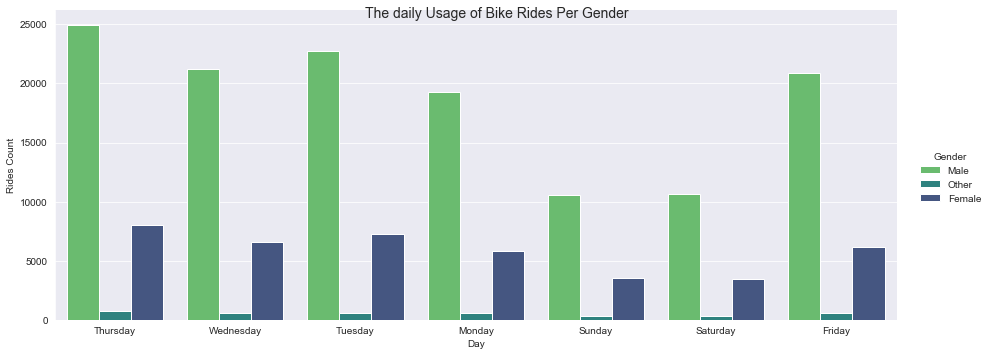

In [13]:
lm = sns.catplot(data=df, x='start_time_day', hue='member_gender', kind='count',aspect=20.7/8.27, palette='viridis_r')

lm.set_axis_labels('Day', 'Rides Count')
lm._legend.set_title('Gender')
lm.fig.suptitle('The daily Usage of Bike Rides Per Gender', fontsize=14);


## (visual 3  - age category)
> In this Visualization I will show number of bike rides over time based on age category.
I divided members age into 5 categories.

11-20
21-30
31-40
41-50
51-60
61-70
71-80
So, I will show number of bike rides per category over time.



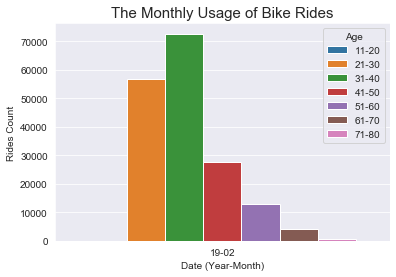

In [14]:
my_order = ['11-20', '21-30', '31-40', '41-50', '51-60' ,'61-70' , '71-80']
ax = sns.countplot(x='start_time_monthly', hue='age_category', hue_order=my_order,
                   data=df.sort_values(by=['start_time_monthly']))

ax.legend().set_title('Age')
ax.set_ylabel('Rides Count')
ax.set_xlabel('Date (Year-Month)')
ax.set_title("The Monthly Usage of Bike Rides", fontsize=15);


## Average Weekday Trip Duration for Customers and Subscribers
> Subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types had an obvious increase of trip duration on Saturdays and Sundays (or weekends), especially casual customers. Subscriber usage was more efficient than customers overall and maintained a pretty consistent average duration Monday through Friday.




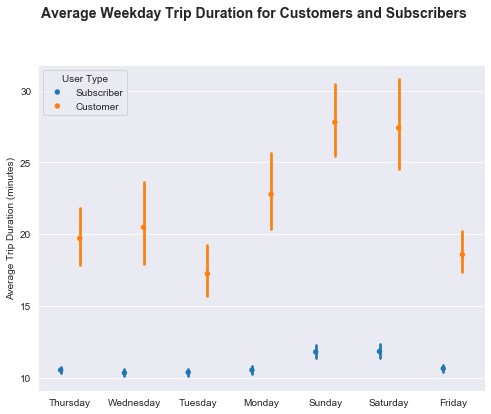

In [19]:
plt.figure(figsize=[8, 6]);
ax = sb.pointplot(data=df, x='start_dayofweek', y='duration_min', hue='user_type', dodge=0.3, markers='.', linestyles="", hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xlabel('');
plt.ylabel('Average Trip Duration (minutes)');
plt.suptitle('Average Weekday Trip Duration for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);
